In [29]:
import os
import numpy as np
import clima_anom as ca

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Plot 3 months per season

In [53]:
# season = 'autumn'
season = 'winter'
# season = 'spring'
# season = 'summer'

year = '2021'

In [54]:
if season == 'summer':
    list_month = ['01', '02', '12']
elif season == 'autumn':
    list_month = ['03', '04', '05']
elif season == 'winter':
    list_month = ['06', '07', '08']
elif season == 'spring':
    list_month = ['09', '10', '11']

print(f'Season: {season}')

Season: winter


In [55]:
from pathlib import Path

for t in range(3):

    print(f'Month: {list_month[t]}')
    file_in = '/mnt/Data/Data/IMERG/Daily_01x01/'+season+'/IMERG_'+year+'_'+list_month[t]+'_01x01_daily.nc'

    if os.path.isfile(file_in):
        tmp = ca.read_netcdf(file_in,0)
        print(f'  File: {file_in}')

        if t == 0:
            lat = tmp['lat']
            lon = tmp['lon']

            nlat = len(lat)
            nlon = len(lon)

            lon2d, lat2d = np.meshgrid(lon, lat)

            pre_mean = np.zeros([3,nlat,nlon])

        pre_mean[t,:,:] = np.mean(tmp['prec'].data,axis=0)

    else:
        print(f'  File: {file_in}')
        print(f'  File ERROR')
        pre_mean[t,:,:] = np.zeros([nlat,nlon])



Month: 06
  File: /mnt/Data/Data/IMERG/Daily_01x01/winter/IMERG_2021_06_01x01_daily.nc
Month: 07
  File: /mnt/Data/Data/IMERG/Daily_01x01/winter/IMERG_2021_07_01x01_daily.nc
Month: 08
  File: /mnt/Data/Data/IMERG/Daily_01x01/winter/IMERG_2021_08_01x01_daily.nc


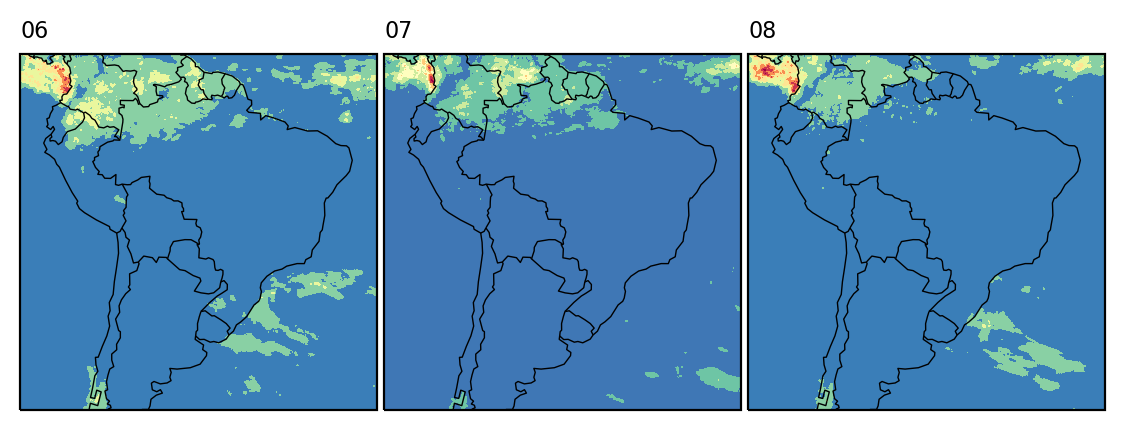

In [56]:
levels = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(7,9.5),dpi=200)
gs = gridspec.GridSpec(1,3)

for col in range(3):
    ax1 = plt.subplot(gs[0, col], projection = proj)
    ax1.coastlines()
    ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
    ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
    ax1.set_extent([-85,-31,-42,8])
    a1 = ax1.contourf(lon2d,lat2d,pre_mean[col,:,:],cmap=cmap,levels=levels,extend='max')
    ax1.set_title(list_month[col],loc='left',fontsize=8)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.02, wspace=0.02)